# Association Rule 

## Assignments Q.1 

### (Book.csv)

### Prepare rules for the all the data sets 
### 1) Try different values of support and confidence. Observe the change in number of rules for different         
###      support, confidence values
### 2) Change the minimum length in apriori algorithm
### 3) Visulize the obtained rules using different plots 

In [1]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
book =pd.read_csv("D:/AssociatilRule/book.csv")

In [4]:
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [5]:
# No of rows and columns
book.shape

(2000, 11)

In [6]:
# Underlying iformation of data
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
# No data transformation/ pre-processing is required as the data is already in the trasactions format

## Applying APRIORI Algorithm


#### 1. Creating Association rules with 10% Support and 70% confidence

In [8]:
# Support 10%
frequent_sets = apriori(book,min_support = 0.1, use_colnames= True)
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x : len(x))

C:\Users\Vaibhav Kinge\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [9]:
frequent_sets


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(ChildBks, YouthBks)",2


In [10]:
# Confidence- 70%
rules = association_rules(frequent_sets, min_threshold=0.7)
rules[rules.lift >1]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
1,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
2,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
3,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
4,"(ChildBks, YouthBks)",(CookBks),0.1650,0.431,0.1290,0.781818,1.813963,0.057885,2.607917
5,"(CookBks, YouthBks)",(ChildBks),0.1620,0.423,0.1290,0.796296,1.882497,0.060474,2.832545
6,"(ChildBks, DoItYBks)",(CookBks),0.1840,0.431,0.1460,0.793478,1.841017,0.066696,2.755158
7,"(DoItYBks, CookBks)",(ChildBks),0.1875,0.423,0.1460,0.778667,1.840820,0.066687,2.606928
8,"(ChildBks, RefBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
9,"(CookBks, RefBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083


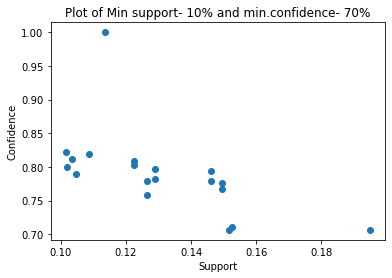

In [11]:
# visualization
plt.scatter('support','confidence', data= rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 10% and min.confidence- 70%')
plt.show()

### 2. Creating Association rules with 5% Support and 50% confidence


In [12]:
# Support 5%
frequent_sets_1 = apriori(book, min_support = 0.05, use_colnames= True)
frequent_sets_1['length'] = frequent_sets_1['itemsets'].apply(lambda x : len(x))
frequent_sets_1

C:\Users\Vaibhav Kinge\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
...,...,...,...
95,0.0600,"(CookBks, YouthBks, DoItYBks, GeogBks)",4
96,0.0560,"(CookBks, YouthBks, GeogBks, ArtBks)",4
97,0.0650,"(CookBks, DoItYBks, GeogBks, ArtBks)",4
98,0.0510,"(ChildBks, YouthBks, CookBks, GeogBks, DoItYBks)",5


In [13]:
# Confidence- 50%
rules_1 = association_rules(frequent_sets_1, min_threshold=0.5)
rules_1[rules_1.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
...,...,...,...,...,...,...,...,...,...
255,"(ChildBks, GeogBks, ArtBks)","(CookBks, DoItYBks)",0.1020,0.1875,0.0535,0.524510,2.797386,0.034375,1.708763
256,"(ChildBks, DoItYBks, ArtBks)","(CookBks, GeogBks)",0.0950,0.1925,0.0535,0.563158,2.925496,0.035212,1.848494
257,"(CookBks, GeogBks, ArtBks)","(ChildBks, DoItYBks)",0.1035,0.1840,0.0535,0.516908,2.809284,0.034456,1.689120
258,"(CookBks, DoItYBks, ArtBks)","(ChildBks, GeogBks)",0.1015,0.1950,0.0535,0.527094,2.703044,0.033708,1.702240


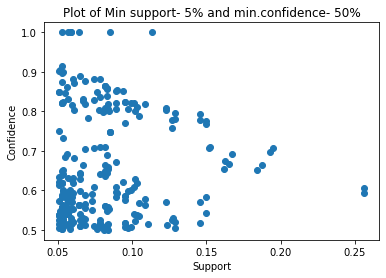

In [14]:
# visualization
plt.scatter('support','confidence', data= rules_1)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 5% and min.confidence- 50%')
plt.show()

### 3. Creating Association rules with 20% Support and 55% confidence

In [15]:
# Support 20%
frequent_sets_2 = apriori(book,min_support = 0.2, use_colnames= True)
frequent_sets_2['length'] = frequent_sets_2['itemsets'].apply(lambda x : len(x))

C:\Users\Vaibhav Kinge\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [16]:
frequent_sets_2

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [17]:
# Confidence- 55%
rules_2 = association_rules(frequent_sets_2, min_threshold=0.55)
rules_2[rules_2.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


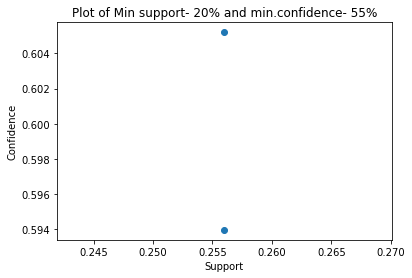

In [18]:
# visualization
plt.scatter('support','confidence', data= rules_2)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 20% and min.confidence- 55%')
plt.show()

===================================================QUestion first==============================================================

# Assignments Q.2

## My Movie.Csv

In [19]:
#Importing the required libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
movie = pd.read_csv("D:/AssociatilRule/my_movies.csv")

In [21]:
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [22]:
# Remove the non-required columns(Columns 1 to 5)
movie1 = movie.iloc[:,5:]
movie1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [23]:
# No of rows and columns
movie1.shape

(10, 10)

In [24]:
# Underlying iformation of data
movie1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [25]:
# No data transformation/ pre-processing is required as the data is already in the trasactions format

## Applying APRIORI Algorithm


### 1. Creating Association rules with 20% Support and 80% confidence

In [26]:
# Support 10%
frequent_sets = apriori(movie1, min_support = 0.2, use_colnames= True)
frequent_sets['length'] = frequent_sets['itemsets'].apply(lambda x : len(x))
frequent_sets

C:\Users\Vaibhav Kinge\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.2,(Green Mile),1
7,0.5,"(Sixth Sense, Gladiator)",2
8,0.4,"(Sixth Sense, Patriot)",2
9,0.2,"(Sixth Sense, Green Mile)",2


In [27]:
# Confidence- 80%
rules = association_rules(frequent_sets, min_threshold=0.8)
rules[rules.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


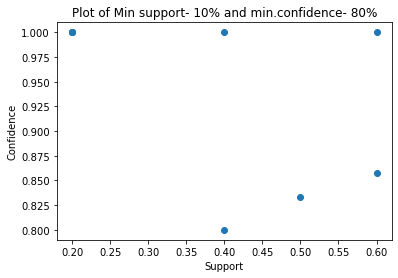

In [28]:
# visualization
plt.scatter('support','confidence', data= rules)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 10% and min.confidence- 80%')
plt.show()

### 2. Creating Association rules with 5% Support and 50% confidence

In [29]:
# Support 5%
frequent_sets_1 = apriori(movie1, min_support = 0.05, use_colnames= True)
frequent_sets_1['length'] = frequent_sets_1['itemsets'].apply(lambda x : len(x))
frequent_sets_1

C:\Users\Vaibhav Kinge\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [30]:
# Confidence- 50%
rules_1 = association_rules(frequent_sets_1, min_threshold=0.5)
rules_1[rules_1.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
211,"(LOTR2, Green Mile)","(Sixth Sense, LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
212,(Harry Potter1),"(Sixth Sense, LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
213,(LOTR1),"(LOTR2, Sixth Sense, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
214,(Green Mile),"(LOTR2, Sixth Sense, LOTR1, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


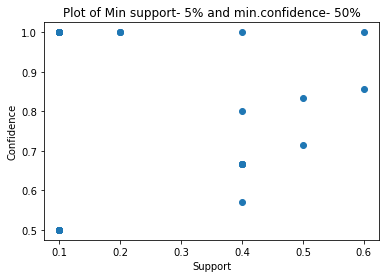

In [31]:
# visualization
plt.scatter('support','confidence', data= rules_1)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 5% and min.confidence- 50%')
plt.show()

### 3. Creating Association rules with 10% Support and 55% confidence

In [32]:
# Support 10%
frequent_sets_2 = apriori(movie1,min_support = 0.1, use_colnames= True)
frequent_sets_2['length'] = frequent_sets_2['itemsets'].apply(lambda x : len(x))
frequent_sets_2

C:\Users\Vaibhav Kinge\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
5,0.2,(LOTR2),1
6,0.1,(Harry Potter2),1
7,0.1,(LOTR),1
8,0.1,(Braveheart),1
9,0.2,(Green Mile),1


In [33]:
# Confidence- 55%
rules_2 = association_rules(frequent_sets_2, min_threshold=0.55)
rules_2[rules_2.lift >1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
130,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
131,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
132,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
133,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


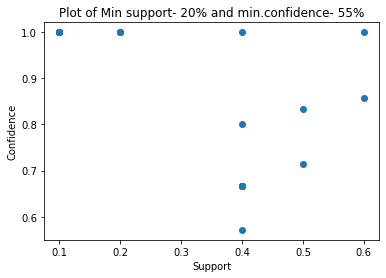

In [34]:
# visualization
plt.scatter('support','confidence', data= rules_2)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Plot of Min support- 20% and min.confidence- 55%')
plt.show()

=============================================Question Second====================================================================